# optimal Agriculture Production 

### Importing Libraries

In [1]:
# agricultural productions optimization engine we will build a optimize agriculture production by building a predictable model
# and suggesting the best crop to grow based on climatic factors and soil condition  model
# if these are not imported we cant be able to utilize it
# for manipulations 
import numpy as np
import pandas as pd
# for data visualizations 
import matplotlib.pyplot as plt
import seaborn as sns
# for interactivity
from ipywidgets import interact
import matplotlib.pyplot as plt

In [2]:
# lets read the dataset by using pandas 
# dataframe is a data structure  with columns of different data types like a spreadsheet 
data = pd.read_csv("C:/Users/kaush/Downloads/DS/data.csv")

In [3]:
# lets check teh shape of the dataset
#2200 is no.of rows in the dataset
#8 is no.of columns in the dataset
print("shape of the Dataset :", data.shape)

shape of the Dataset : (2200, 8)


In [4]:
# lets check the head of the dataset 
# this is very useful  for quickly testing if the object has the right data in it 
data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [5]:
# lets check if there is any missing value present in the dataset
# machine learning models cannot handle missing values so we need to remove them
# if any missing values then we do use mean -numerical values,medain - if outliers  
#or mode - if categorial value to replace the missing values
data.isnull () .sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
# lets check the Crops present in this Dataset
# by using value_counts function it returns the unique values present in the column
# first element is most frequently occured element they exclude na values as default
data ['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [7]:
# lets check the Summary for all the crops
# average climatic required for crops to grow here we use mean to obtain minumum values
print("Average Ratio of Nitrogen in the Soil : {0:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(data ['P'].mean ()))
print("Average Ratio of Potassium in the Soil: {0:.2f}".format (data['K'].mean()))
print("Average Tempature in Celsius : {0:.2f}".format (data['temperature'].mean ()))
print("Average Relative Humidity in % : {0:.2f}".format (data ['humidity'].mean ()))
print("Average PH Value of the soil: {0:.2f}".format (data[ 'ph'].mean ()))
print("Average Rainfall in mm : {0: .2f}".format(data ['rainfall'].mean ()))

Average Ratio of Nitrogen in the Soil : 50.55
Average Ratio of Phosphorous in the Soil : 53.36
Average Ratio of Potassium in the Soil: 48.15
Average Tempature in Celsius : 25.62
Average Relative Humidity in % : 71.48
Average PH Value of the soil: 6.47
Average Rainfall in mm :  103.46


In [1]:
# lets check the Summary statistics for each of the Crops
# funtion that add interactivity and will also output results for each crop with the proper formatting
# by using interact we are getting dropdown list.
@interact
def summary (crops = list(data['label'].value_counts() .index)) :
    #print(crops)
    x = data[data['label'] == crops]
    print(".........")
    print("statistics for Nitrogen")
    print("Minimum Nitrigen required :",x['N'].min())
    print("Average Nitrogen required :",x['N'].mean())
    print("Maximum Nitrogen required :",x['N'].max())
    print(".........")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :",x['P'].min())
    print("Average Phosphorous required :",x['P'].mean())
    print("Maximum Phosphorous required :",x['P'].max())
    print(".........")
    print("Statistics for Pottasium")
    print("Minimum Pottasium required :",x['K'].min())
    print("Average Pottasium required :",x['K'].mean())
    print("Maximum Pottasium required :",x['K'].max())
    print("statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("...............")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format (x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format (x['humidity'].max()))
    print("...............")
    print("statistics for PH")
    print("Minimum PH required : {0:.2f}".format (x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print(".............")
    print("Statistics for Rainfall")
    print ("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format (x['rainfall'].max()))

NameError: name 'interact' is not defined

In [93]:
# lets make this function more clear
# we can do that by seperating the crops which have lower then average requirement for the soil and 
#climatic conditions similarily we can also divide the crops which have higher then average requirement for the soil and 
#climatic conditions 
# help us to identity those crops which have unusual soil and climaric conditions
# unusual these findings are called  as Anomalies in data science
# complete crops overview
@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Crops which require greater than average", conditions,'\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique ())
    print(".................................................................................")
    print("Crops which require less than average", conditions,'\n')
    print(data[data[conditions] <= data[conditions].mean ()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [124]:
## Lets compare the Average Requirement for each crops with average conditions
# we specify the climatic and soil conditions based on which we have to compare 
#the crops after that we will be printing avg requirements of the crop
# here we get the avg of attribute afte that we can compare the crop which to be grown
@interact
def compare (conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Average Value for", conditions, "is {0: .2f}".format (data [conditions].mean()))
    print("..................................")
    print("Rice : {0:.2f}".format (data[(data['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(data[data['label'] == 'blackgram'][conditions].mean()))
    print("Banana: {0:.2f}".format (data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[(data['label'] =='jute')][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[(data['label'] == 'apple')][conditions ].mean()))
    print("Papaya: {0:.2f}".format (data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[data['label'] == 'muskmelon '][conditions].mean()))
    print("Grapes : {0: .2f}".format(data[(data['label'] == 'grapes')] [conditions ].mean()))
    print("Watermelon: {0:.2f}".format(data[(data['label'] == 'watermelon')] [conditions ].mean ()))
    print("Kidney Beans: {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data[(data['label'] == 'mungbean')][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'orange')][conditions]. mean()))
    print("Chick Peas : {0: .2f}".format(data[(data['label'] == 'chickpea')][conditions].mean ()))
    print("Lentils : {0:.2f}".format(data[(data['label'] == 'lentil')][conditions ].mean()))
    print("Cotton : {0:.2f}".format(data[(data['label'] == 'cotton')][conditions].mean()))
    print("Maize : {0: 2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0: .2f}".format(data[(data['label'] == 'mothbeans')][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label'] == 'pigeonpeas')][conditions].mean ()))
    print("Mango : {0: 2f}".format(data[(data['label'] == 'mango')][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0: .2f}".format(data[(data['label'] == 'coffee')][conditions].mean()))


interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [125]:
@interact
def compare(conditions=['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Average Value for", conditions, "is {:.2f}".format(data[conditions].mean()))
    print("..................................")
    crops = data['label'].unique()
    for crop in crops:
        avg_requirement = data[data['label'] == crop][conditions].mean()
        if pd.isna(avg_requirement):
            print(f"{crop}: No data available for the selected condition.")
        else:
            print(f"{crop}: {avg_requirement:.2f}")


interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

### Distribution

In [94]:
###Distribution of all soils and climatic conditions for all the different crops present in this dataset
###we do distribution because this is foundation for all statistics and probability it shows all possible values in  the given field 
#or columns with there associative occurence this helps us to  visualize the anomolies 
#or outliers that are present in the data the distribution also helps us to get the complete idea about the overall pattern

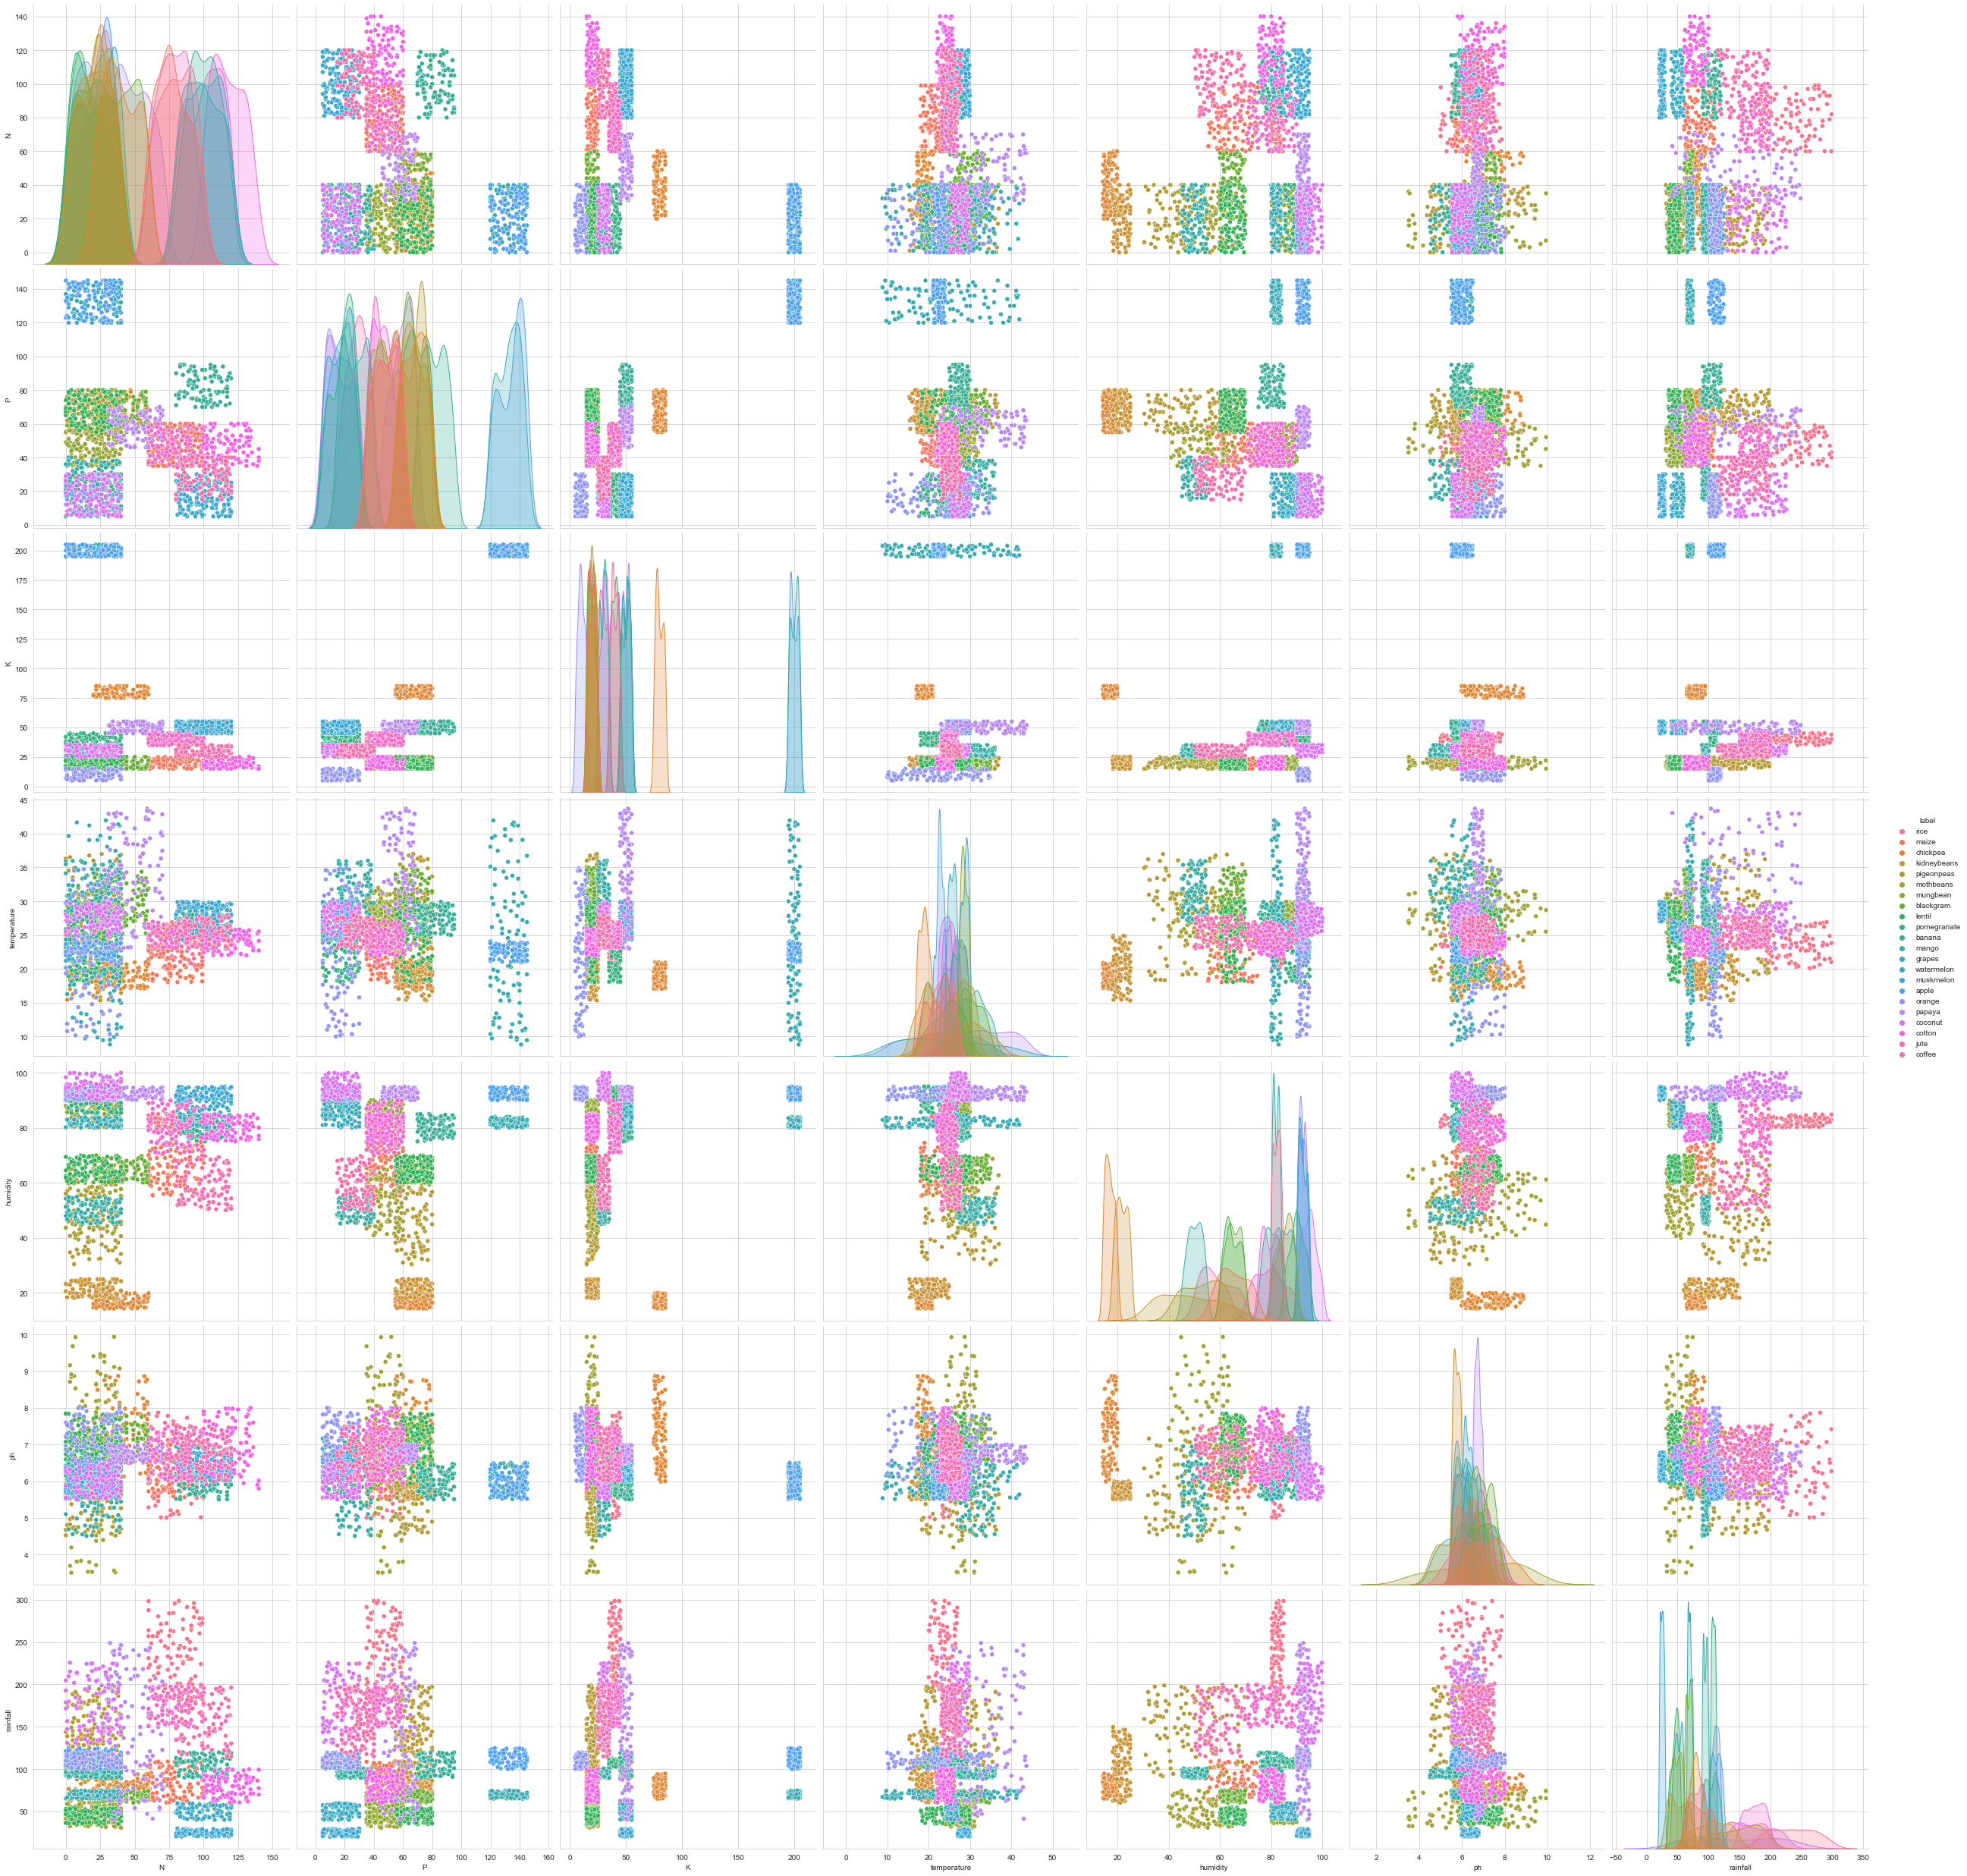

In [95]:
sns.set_style("whitegrid");
sns.pairplot(data, hue="label", height=5);
plt.show()

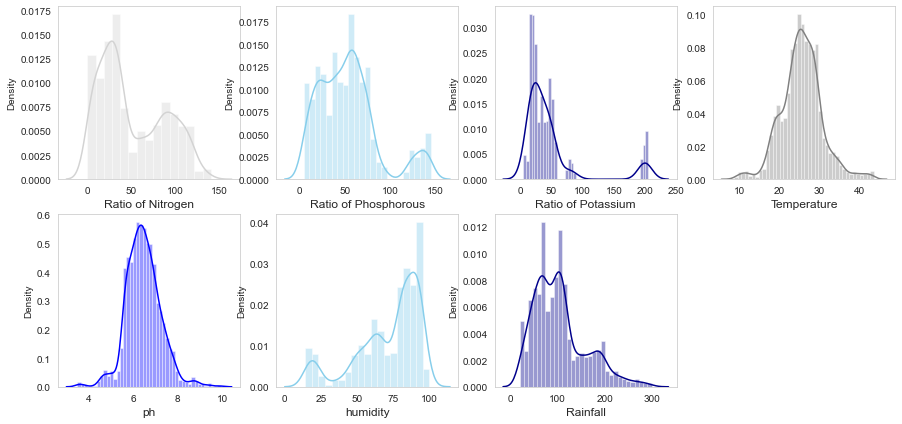

In [96]:
### Lets check the distribution of Agricultural Conditions
### here distplot stands for distribition plot and seaborn for visualization library
# distribution chart gives us overall idea 
# Lets import the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings ('ignore')
plt.rcParams['figure.figsize'] = (15, 7)
plt.subplot(2, 4, 1)
sns.distplot (data['N'], color = 'lightgrey')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()
plt.subplot (2, 4, 2)
sns.distplot (data['P'], color = 'skyblue')
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()
plt.subplot(2, 4, 3)
sns.distplot (data['K'], color = 'darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()
plt.subplot(2, 4, 4)
sns.distplot (data['temperature'], color = 'grey')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()
plt.subplot(2, 4, 5)
sns.distplot (data['ph'], color = 'blue')
plt.xlabel('ph', fontsize = 12)
plt.grid()
plt.subplot(2, 4, 6)
sns.distplot (data['humidity'], color = 'skyblue')
plt.xlabel('humidity', fontsize = 12)
plt.grid()
plt.subplot(2, 4, 7)
sns.distplot (data['rainfall'], color = 'darkblue')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

#crops which require high  proportions of k and p as distribution chart for both p and k are highly skewed 
#apart from that we can see there are some crops which require very high and very low temp for their growth 
#similarly there are some crops which require very low and  very high ph values in the soil 


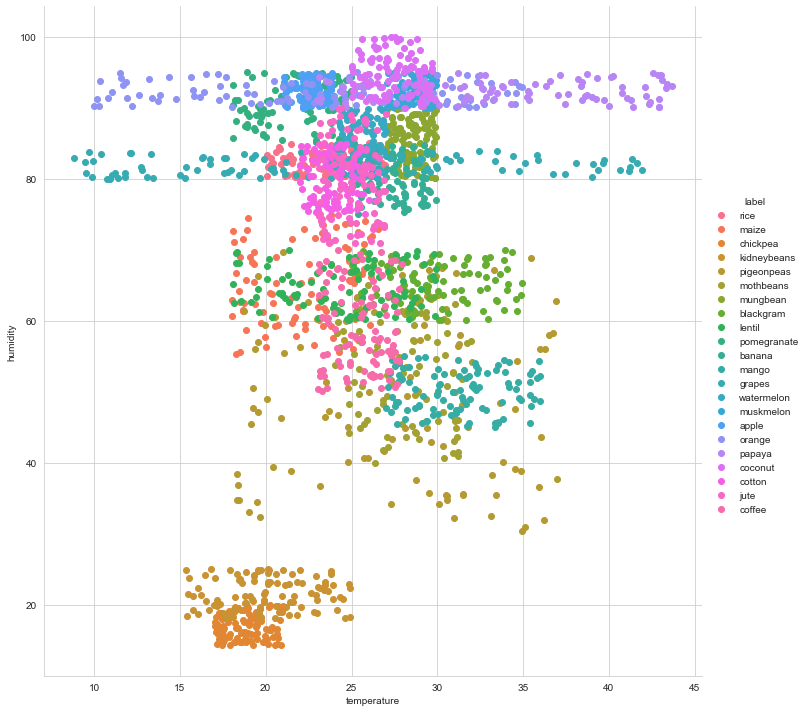

In [97]:
#By using this code, you can gain insights into how the temperature and humidity 
#values vary across different crops. The scatter plot allows you to observe any patterns, 
#clusters, or trends in the data. The different colors assigned to each crop in the plot's legend make
#it easier to distinguish and identify specific crops.sns.set_style("whitegrid");
sns.FacetGrid(data, hue='label', size=10) \
.map(plt.scatter, "temperature", "humidity") \
.add_legend();
plt.show()

In [98]:
## Lets find out some Interesting Facts
#using filtering conditions
#we try to filter crops which have extreme soil and climatic requirements 
#we can see the min and max thresholds by looking distribution charts in the result

print("Some Interesting Patterns")
print("...........................................................................................")
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100] ['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("Crops which requires very High Rainfall: ", data[data['rainfall'] > 200]['label' ].unique())
print("Crops which requires very Low Temperature :", data[data['temperature'] < 10]['label'].unique())
print("Crops which requires very High Temperature :", data[data['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidity:", data [data[ 'humidity'] <20]['label'].unique())
print("Crops which requires very Low pH:", data [data['ph'] < 4]['label'].unique())
print("Crops which requires very High pH:", data[data[ 'ph'] > 9]['label'].unique())

Some Interesting Patterns
...........................................................................................
Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall:  ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature : ['grapes']
Crops which requires very High Temperature : ['grapes' 'papaya']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low pH: ['mothbeans']
Crops which requires very High pH: ['mothbeans']


In [99]:
### Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season
### we used the filtering conditions here we need to filter crops based on temperature and humidity
print("Summer Crops")
print (data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("----------------------------------------------------------")
print("Winter Crops")
print (data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("----------------------------------------------------------")
print("Rainy Crops")
print (data[(data['rainfall'] > 200) & (data[ 'humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
----------------------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
----------------------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [100]:
#now we will find similar crops based on soil and climatic conditions we are gng t use concept of clustering analysis 
#this helps in alternating farming
#clustering analysis is the technique used to classify the datapoints into relative groups called clusters
### Lets try to cluster these Crops
# Lets import the warnings library so that we can avoid warnings
#we will remove label column because unsupervised learning didnt need any label name for training data
# we use drop for removing

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings ('ignore')
# Lets select the Spending score, and Annual Income Columns from the Data
x = data.loc[:, ['N', 'P','K', 'temperature', 'ph', 'humidity', 'rainfall']].values
# Let's check the shape of x
print(x.shape)
# Lets convert this data into a dataframe
x_data = pd.DataFrame (x)
x_data.head()

(2200, 7)


0     1     2          3         4          5           6
0  90.0  42.0  43.0  20.879744  6.502985  82.002744  202.935536
1  85.0  58.0  41.0  21.770462  7.038096  80.319644  226.655537
2  60.0  55.0  44.0  23.004459  7.840207  82.320763  263.964248
3  74.0  35.0  40.0  26.491096  6.980401  80.158363  242.864034
4  78.0  42.0  42.0  20.130175  7.628473  81.604873  262.717340

### Clustering

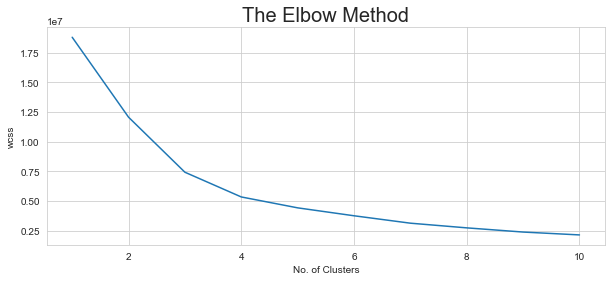

In [101]:
# Lets determine the optimum Number of Clusters within the Dataset
# we will have to determine right no.of clusters to that are req for seperating these data points for doing that we use elbow method
# for finding optimal no.of clusters we can see elbow chart
# we have two elbows one  at point 3 and second at point 4 now we need to choose latest elbow that is we choose 4 and 
#we are going to have 4 clusters
# we now apply kmeans algorithm 
plt.rcParams['figure.figsize'] = (10, 4)
wcss = []
for i in range(1, 11):
    km = KMeans (n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km. inertia_)
#Lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [102]:
# Lets implement the K Means algorithm to perform Clustering analysis
# we specify end clusters parameters inside kmeans clustering algorithm
# the algorithm is defined next we will train our data using this algorithm and store in varaible y_means
# crops in same clusters are similar to each other which help to choose alternate crops very easily 
#and maximise their productivity
km = KMeans (n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict (x)
# Lets find out the Results
a = data['label']
y_means = pd.DataFrame (y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename (columns = {0: 'cluster'})
# Lets check the Clusters of each Crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("..........................................................................")
print("Crops in Second Cluster:", z[z['cluster']==1]['label'].unique())
print("...........................................................................")
print("Crops in Third Cluster:", z[z['cluster']== 2]['label'].unique())
print("...........................................................................")
print("Crops in Forth Cluster:", z[z['cluster'] ==3]['label' ].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
..........................................................................
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
...........................................................................
Crops in Third Cluster: ['grapes' 'apple']
...........................................................................
Crops in Forth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [103]:
# Lets split the Dataset for Predictive Modelling
# suggest best crops according to soil and climatic conditions availble in their specific region
# simple examples of ai applictions we train machine learning model using training dataset 
# after model get trained we use same model to give predictions for specific set of data
# model will get used to learn trends and  some patterns from data so that we can do predictions later
# if model cant learn patterns then we will use evaluation matrixes
# help us in evaluating models performance used to analyze the performance of predictive models and 
# generate trust these evaluation matrix helps us to  generate accuracy score so we can tell how much accurate 
# the predictions are made.
# we seperate label if we not do model may misbehave
# store in y  and rest in x .dont keep both together as we need to predict y if we keep x and y together 
# model will come to know about lables and there will be no point of training them. 
# x will contain all columns such as ratio of  potassium,nitrogen etc,..
# in this code label mean name of crop


y = data['label']
x = data.drop(['label'], axis = 1)
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [104]:
# Lets create Training and Testing Sets for Validation of Results
# logisic regresion - probilistic model that works very well in cases of likelihhod and multiple classes
# classes means labels
# 20 classes are there now - it generally works in case where classes are more than 2 
# so here we can use logistic regression here
# splitting dataset into testing and training set so we can check accuracy of our model on testing set 
# after training the model using the training set 
# training set has 1780 rows and training has 440 we did 80:20 split 80 for training,20 testing set 
# now we generate machine mearning predictive model
# after model is defined we trainmodel using train function . we train model by x_train and y_train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440,)


# Logistic Regression

In [105]:
# Lets create a Predictive Model
# by using predict function we will predict the model for testing set 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [106]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  1  1  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [107]:
# Lets evaluate the Model Performance
# help us to understand accuracy of model
# classification_report gives accuracy of classification model includes precision  and recall 
# high value of precision and recall then your model is highly accurate.
from sklearn.metrics import classification_report
# Lets print the Classification Report also
cr= classification_report (y_test, y_pred)
print (cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [108]:
data.head()


N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [2]:
prediction = model.predict((np.array([[90,40,40,20,80,7,200]])))
print("The suggested model for given classifier condition is :" ,prediction)

NameError: name 'model' is not defined

In [110]:
# lets do some mangoes real time predictions
data[data['label'] == 'orange'].head() 

N   P   K  temperature   humidity        ph    rainfall   label
1600  22  30  12    15.781442  92.510777  6.354007  119.035002  orange
1601  37   6  13    26.030973  91.508193  7.511755  101.284774  orange
1602  27  13   6    13.360506  91.356082  7.335158  111.226688  orange
1603   7  16   9    18.879577  92.043045  7.813917  114.665951  orange
1604  20   7   9    29.477417  91.578029  7.129137  111.172750  orange

In [111]:
prediction = model.predict((np.array([[20,30,10,15,90,7.5,100]])))
print("The suggested model for given classifier condition is :" ,prediction)

The suggested model for given classifier condition is : ['orange']


In [112]:
from sklearn.metrics import accuracy_score
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:",result2)

Accuracy: 0.9681818181818181


### KNN Classification

In [113]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
y_pred=knn_clf.predict(x_test)

In [114]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [115]:
cr= classification_report (y_test, y_pred)
print (cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      0.94      0.97        16
      grapes       1.00      1.00      1.00        18
        jute       0.79      0.90      0.84        21
 kidneybeans       0.91      1.00      0.95        20
      lentil       1.00      1.00      1.00        17
       maize       0.95      1.00      0.97        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [116]:
prediction = model.predict((np.array([[90,40,40,20,80,7,200]])))
print("The suggested model for given classifier condition is :" ,prediction)

The suggested model for given classifier condition is : ['rice']


In [117]:
prediction = model.predict((np.array([[20,30,10,15,90,7.5,100]])))
print("The suggested model for given classifier condition is :" ,prediction)

The suggested model for given classifier condition is : ['orange']


In [118]:
from sklearn.metrics import accuracy_score
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:",result2)

Accuracy: 0.9772727272727273


In [119]:
data['label'] = data['label'].map({
    'rice'         :1, 
    'maize'        :2,
    'jute'         :3,
    'cotton'       :4,
    'coconut'      :5,
    'papaya'       :6,
    'orange'       :7,
    'apple'        :8,
    'muskmelon'    :9,
    'watermelon'   :10,
    'grapes'       :11,
    'mango'        :12,
    'banana'       :13,
    'pomegranate'  :14,
    'lentil'       :15,
    'blackgram'    :16,
    'mungbean'     :17,
    'mothbeans'    :18,
    'pigeonpeas'   :19,
    'kidneybeans'  :20,
    'chickpea'     :21,
    'coffee'       :22
    }).astype(int)

In [120]:
# Lets make this funtion more Intuitive
@interact
def compare (conditions = ['N', 'P','K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Crops which require greater than average", conditions, '\n')
    print (data[data[conditions]>data[conditions].mean()]['label'].unique())
    print(" -")
    print("Crops which require less than average", conditions, '\n')
    print (data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…